## Linear Models for Classification

Linear models are also extensively used for classification. Let’s look at binary classification first. In this case, a prediction is made using the following formula:

$y(estimate) = w[0]*x[0] + w[1]*x[2] + ... + w[p]*x[p] > 0$

The formula looks very similar to the one for linear regression, but instead of just returning the weighted sum of the features, we threshold the predicted value at zero. If the function is smaller than zero, we predict the class –1; if it is larger than zero, we predict the class +1.

For linear models for regression, the output, $y(estimate)$, is a linear function of the features: a line, plane, or hyperplane (in higher dimensions). For linear models for classification,
the **decision boundary** is a linear function of the input. In other words, a (binary) linear classifier is a classifier that separates two classes using a line, a plane, or a hyperplane.

The two most common linear classification algorithms are logistic regression, implemented in *linear_model.LogisticRegression* , and linear support vector machines (linear SVMs), implemented in *svm.LinearSVC* (SVC stands for support vector classifier). Despite its name, LogisticRegression is a classification algorithm and not a
regression algorithm.

In [1]:
import pandas as pd
import mglearn
import matplotlib 
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [3]:
X, y = mglearn.datasets.make_forge()

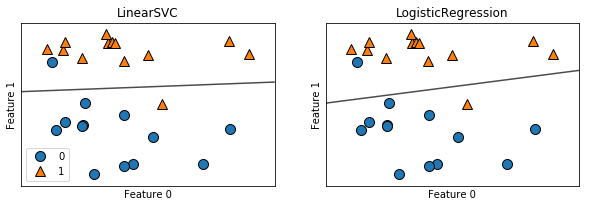

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                  ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

*Figures above show Decision boundaries of a linear SVM and logistic regression on the forge dataset with the default parameters*

In the above figures, the **decision boundaries** found by *LinearSVC* and *LogisticRegression* are plotted as straight lines Seperating the area between class 1 and 0.  

There is also a trade-off parameter that determines the strength of the regularization called *C*. The higher the value of C the lesser the generalization is. 

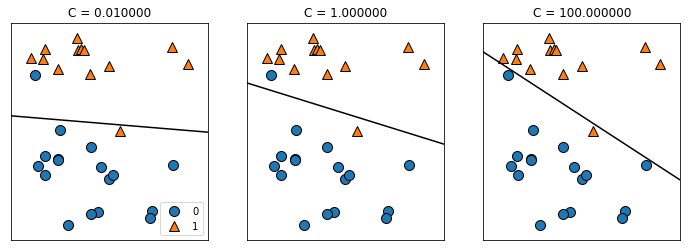

In [5]:
mglearn.plots.plot_linear_svc_regularization()

*Figures above show decision boundaries of a linear SVM on the forge dataset for different values of C.* 

#### *LinearLogistic* in more details

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
         cancer.target, stratify=cancer.target, random_state=43)

logreg=LogisticRegression().fit(X_train, y_train)
print('Training set score is: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Test set score is: {:.2f}'.format(logreg.score(X_test, y_test)))

Training set score is: 0.96
Test set score is: 0.94


Here the default value of C=1 which provides quite good performance. As training and test set performance are very close, it is likely that we are underfitting. Let's try to increase the value of C. 

In [7]:
logreg_100 = LogisticRegression(C=100).fit(X_train, y_train)
print('Training set score is: {:.2f}'.format(logreg_100.score(X_train, y_train)))
print('Test set score is: {:.2f}'.format(logreg_100.score(X_test, y_test)))

Training set score is: 0.98
Test set score is: 0.97


Using C=100 results in higher training and test sets accuracy. Let's also try with lower C values, C=0.01

In [8]:
logreg_001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('Training set score is: {:.2f}'.format(logreg_001.score(X_train, y_train)))
print('Test set score is: {:.2f}'.format(logreg_001.score(X_test, y_test)))

Training set score is: 0.93
Test set score is: 0.92


Let's also look at the coefficients

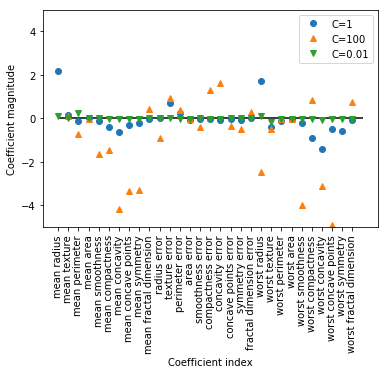

In [9]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg_100.coef_.T, '^', label='C=100')
plt.plot(logreg_001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.legend()

*Figure above shows coefficients learned by logistic regression on the Breast Cancer dataset for different values of C*

For the above logistic regression, L2 regularization was used. For the next visualsation, we are using L1 regularization. 

If you need more information about *L1 and L2* regularziation, you should read this website. [http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/]

Training accuracy of l1 logreg with 0.001: 0.91
Test accuracy of l1 logreg with 0.001: 0.92
Training accuracy of l1 logreg with 1.000: 0.96
Test accuracy of l1 logreg with 1.000: 0.95
Training accuracy of l1 logreg with 100.000: 0.99
Test accuracy of l1 logreg with 100.000: 0.97


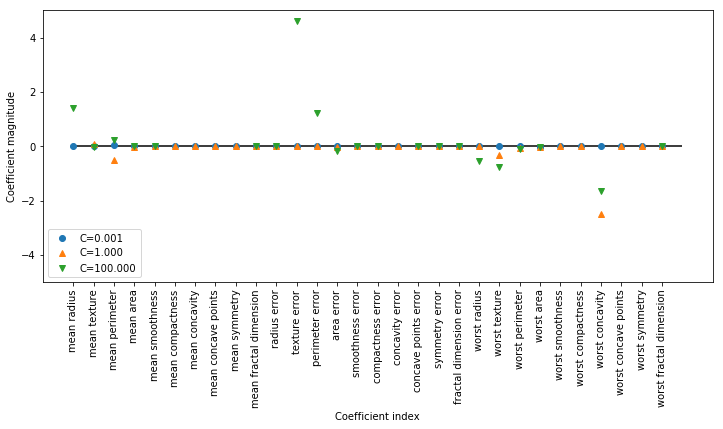

In [28]:
plt.figure(figsize=(12,5))
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print('Training accuracy of l1 logreg with {:.3f}: {:.2f}'.format(
            C, lr_l1.score(X_train, y_train)))
    print('Test accuracy of l1 logreg with {:.3f}: {:.2f}'.format(
            C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.ylim(-5, 5)
plt.legend(loc=3)

    

*Figure above shows the coefficients learned by logistic regression with L1 penalty on the Breast cancer dataset for different values of C*

As seen, there are many parallels between linear models for binary classification and linear models for regression. As in regression, the main difference between the models is the penalty parameter, which influences the regularization and
whether the model will use all available features or select only a subset.

### Linear models for different classification

**Many linear classification models are for binary classification only, and don’t extend
naturally to the multiclass case (with the exception of logistic regression). A common technique to extend a binary classification algorithm to a multiclass classification
algorithm is the one-vs.-rest approach.** in this approach, a binary model is learned for each class that tries to seperate that class from all of the other classes, resulting in as many binary models as there are classes. To make a prediction, all binary classifiers are run on a test point. Then the classifier that has the highest score on its single class "wins", and this class label is returned as the prediction.

Having one binary classifier per class results in having one vector of coefficients (w) and one intercept (b) for each class. The class for which the result of the classification
confidence formula given here is highest is the assigned class label:

$w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b$

Let’s apply the one-vs.-rest method to a simple three-class classification dataset. We use a two-dimensional dataset, where each class is given by data sampled from a Gaussian distribution.

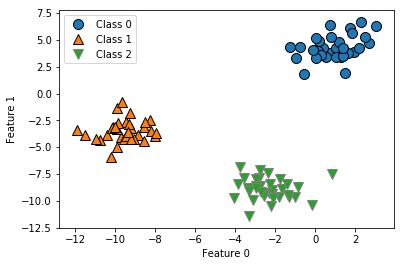

In [32]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=333)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2'])
#plt.legend()

*Figure above shows tow-dimensionla dataset containing three classes*

Now, I train a *LinearSVC* classifier on the dataset:

In [33]:
linear_svm = LinearSVC().fit(X, y)
print('Coefficient shape:', linear_svm.coef_.shape)
print('Intercept shape:', linear_svm.intercept_.shape)

Coefficient shape: (3, 2)
Intercept shape: (3,)


In [34]:
linear_svm.coef_

array([[ 0.08945558,  0.41234762],
       [-0.33122336,  0.08296539],
       [ 0.25052441, -0.35255045]])

In [35]:
linear_svm.intercept_

array([ 0.19641276, -1.46267539, -0.4938951 ])

The shape of the *coeff_* is (3,2) which means there 3 for 3 classes and 2 for each feature. The shape of the intercept is 3 which means there are 3 values for each class. 

Now, we are going to visualize the lines given by the 3 binary classifier. 

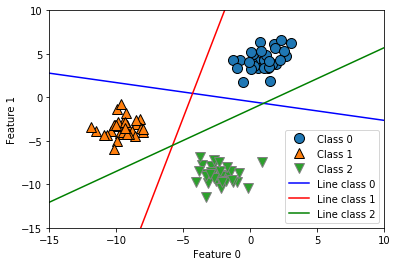

In [75]:
import numpy as np
mglearn.discrete_scatter(X[:, 0], X[:,1],y)
line = np.linspace(-15, 10)

for coef, intercept, color in zip(linear_svm.coef_, 
                                   linear_svm.intercept_,
                                   ['b','r','g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-15, 10)
plt.xlim(-15, 10)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2', 
           'Line class 0', 'Line class 1',
           'Line class 2'], loc='best')


This is what it means by *coef[0]* and *coef[1]*

In [81]:
for coef in linear_svm.coef_:
    print(coef[0])

0.089455578548
-0.331223358554
0.250524413015


In [83]:
for coef in linear_svm.coef_:
    print(coef[1])

0.412347616162
0.082965390341
-0.352550445425


In [84]:
for intercept in linear_svm.intercept_:
    print(intercept)

0.196412758887
-1.46267538788
-0.493895097702
